In [12]:
import os
import numpy as np
import pandas as pd
import geopandas as gpd
import earthpy as et 
import matplotlib.pyplot as plt
import contextily as cx

# Set working dir & get data - NOTE: should already be done
# data = et.data.get_data('spatial-vector-lidar')
# os.chdir(os.path.join(et.io.HOME, 'earth-analytics'))

In [3]:
# Import roads shapefile
sjer_roads_path = os.path.join("data", "data", "spatial-vector-lidar", "california", 
                               "madera-county-roads", "tl_2013_06039_roads.shp")
sjer_roads = gpd.read_file(sjer_roads_path)

type(sjer_roads)

geopandas.geodataframe.GeoDataFrame

In [5]:
# View data type 
print(type(sjer_roads['RTTYP']))

# View unique attributes for each road in the data
print(sjer_roads['RTTYP'].unique())

<class 'pandas.core.series.Series'>
['M' None 'S' 'C']


In [6]:
# Map each value to a new value 
sjer_roads["RTTYP"] = sjer_roads["RTTYP"].fillna("Unknown")
print(sjer_roads['RTTYP'].unique())

['M' 'Unknown' 'S' 'C']


Import the madera-county-roads layer - `california/madera-county-roads/tl_2013_06039_roads.shp`. Plot the roads.

Next, try to overlay the plot locations `california/SJER/vector_data/SJER_plot_centroids.shp` and sjer_crop- `california/SJER/vector_data/SJER_crop.shp` on top of the SJER crop extent. What happens?

Check the CRS of both layers. What do you notice?

In [8]:
madera_roads_path = os.path.join("data", "data", "spatial-vector-lidar", "california", "madera-county-roads", "tl_2013_06039_roads.shp")

madera_roads = gpd.read_file(madera_roads_path)
sjer_centroids = gpd.read_file("data/data/spatial-vector-lidar/california/neon-sjer-site/vector_data/SJER_plot_centroids.shp")
sjer_crop = gpd.read_file("data/data/spatial-vector-lidar/california/neon-sjer-site/vector_data/SJER_crop.shp")


In [19]:
madera_crop = gpd.clip(madera_roads, sjer_crop.to_crs(madera_roads.crs))
madera_crop.crs = madera_roads.crs

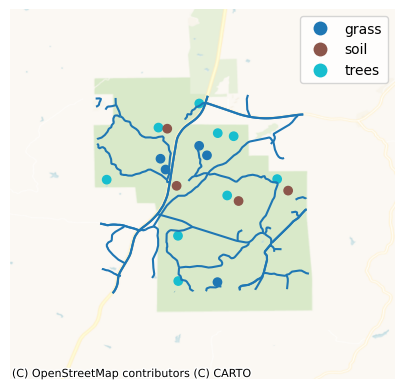

In [30]:
f, ax = plt.subplots()

madera_crop.plot(
    ax=ax
)

sjer_centroids.to_crs(madera_crop.crs).plot(
    ax=ax,
    column="plot_type",
    categorical=True,
    legend=True
)

adjustment = 0.02

plt.xlim(madera_crop.total_bounds[0] - adjustment, madera_crop.total_bounds[2] + adjustment)
plt.ylim(madera_crop.total_bounds[1] - adjustment, madera_crop.total_bounds[3] + adjustment)

ax.set_axis_off()

cx.add_basemap(ax=ax, crs=madera_crop.crs, source=cx.providers.CartoDB.Voyager)